In [40]:
import numpy as np
import matplotlib.pyplot as plt

def generate_gilbert_random_graph(num_vertices, probability, directed=False):
    edges = []
    for i in range(num_vertices):
        for j in range(i + 1, num_vertices):
            if directed:
                if np.random.rand() < probability:
                    edges.append((i, j))
            else:
                if np.random.rand() < probability:
                    edges.append((i, j))
                    edges.append((j, i))
    return edges

def convert_to_adjacency_matrix(edges, num_vertices, directed=False):
    adjacency_matrix = [[0] * num_vertices for i in range(num_vertices)]
    for edge in edges:
        vertex1, vertex2 = edge
        adjacency_matrix[vertex1][vertex2] = 1
        if not directed:
            adjacency_matrix[vertex2][vertex1] = 1
    return adjacency_matrix

# Generate undirected unweighted Gilbert random graph
num_vertices_undirected = 1500
probability_undirected = 0.3
undirected_edges = generate_gilbert_random_graph(num_vertices_undirected, probability_undirected)
undirected_adjacency_matrix = convert_to_adjacency_matrix(undirected_edges, num_vertices_undirected)

print('Undirected Unweighted Gilbert Random Graph')
print(f"No of nodes = {len(undirected_adjacency_matrix)}")
print(f"No of edges = {len(undirected_edges)}")

# Generate directed unweighted Gilbert random graph
num_vertices_directed = 1500
probability_directed = 0.3
directed_edges = generate_gilbert_random_graph(num_vertices_directed, probability_directed, directed=True)
directed_adjacency_matrix = convert_to_adjacency_matrix(directed_edges, num_vertices_directed, directed=True)

print('\nDirected Unweighted Gilbert Random Graph')
print(f"No of nodes = {len(directed_adjacency_matrix)}")
print(f"No of edges = {len(directed_edges)}")

Undirected Unweighted Gilbert Random Graph
No of nodes = 1500
No of edges = 674164

Directed Unweighted Gilbert Random Graph
No of nodes = 1500
No of edges = 338123


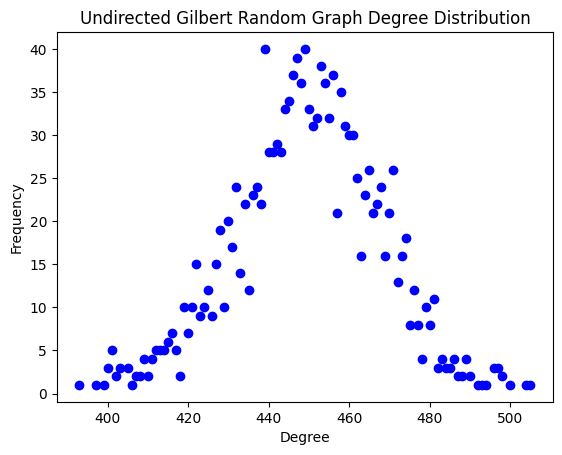

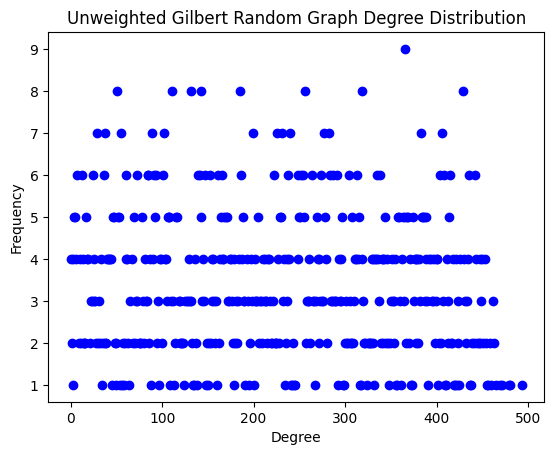

In [41]:
import numpy as np
import matplotlib.pyplot as plt

def degree_distribution(adjacency_matrix):
    degrees = np.sum(adjacency_matrix, axis=1)
    unique_degrees, degree_counts = np.unique(degrees, return_counts=True)
    return unique_degrees, degree_counts

def plot_degree_distribution_scatter(unique_degrees, degree_counts, title):
    plt.scatter(unique_degrees, degree_counts, color='b', marker='o')
    plt.title(title)
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.show()

# Plot degree distribution scatterplot for undirected unweighted Gilbert random graph
undirected_unique_degrees, undirected_degree_counts = degree_distribution(undirected_adjacency_matrix)
plt.scatter(undirected_unique_degrees, undirected_degree_counts, color='b', marker='o')
plt.title('Undirected Gilbert Random Graph Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.savefig('Undirected Degree Distribution.png')
plt.show()
print()

# Plot degree distribution scatterplot for directed unweighted Gilbert random graph
directed_unique_degrees, directed_degree_counts = degree_distribution(directed_adjacency_matrix)
plt.scatter(directed_unique_degrees, directed_degree_counts, color='b', marker='o')
plt.title('Unweighted Gilbert Random Graph Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.savefig('Unweighted Degree Distribution.png')
plt.show()

It can be inferred that the unweighted random network produces a more consistent plot which does not contains peaks or valleys. the undirected graph is very close to the binomial curve which denotes that a large number of nodes take have a close to average degree. There is no such pattern in the unweighted random graph.

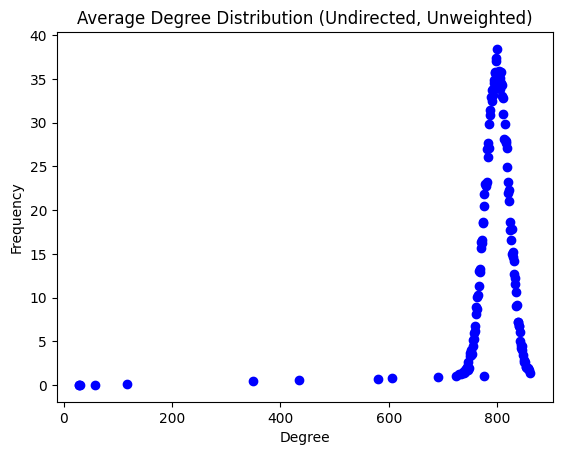

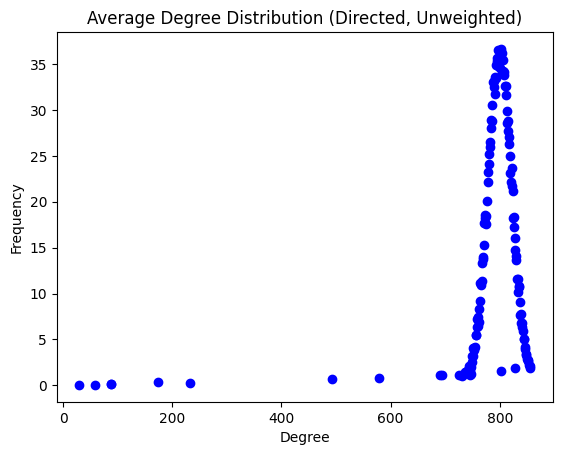

In [42]:
import numpy as np
import matplotlib.pyplot as plt

def generate_gilbert_random_graph(num_vertices, probability, directed=False):
    edges = []
    for i in range(num_vertices):
        for j in range(i + 1, num_vertices):
            if directed:
                if np.random.rand() < probability:
                    edges.append((i, j))
            else:
                if np.random.rand() < probability:
                    edges.append((i, j))
                    edges.append((j, i))
    return edges

def degree_distribution(adjacency_matrix):
    degrees = np.sum(adjacency_matrix, axis=1)
    unique_degrees, degree_counts = np.unique(degrees, return_counts=True)
    return unique_degrees, degree_counts

def plot_degree_distribution_scatter(unique_degrees, degree_counts, title):
    print()
    plt.scatter(unique_degrees, degree_counts, color='b', marker='o')
    plt.title(title)
    plt.xlabel('Degree')
    plt.ylabel('Frequency')
    plt.savefig(f"{title}.png")
    plt.show()

def generate_and_plot_average_degree_distribution(num_instances, num_vertices, probability, directed=False):
    all_unique_degrees = []
    all_degree_counts = []

    max_degrees = 0
    for i in range(num_instances):
        random_graph_edges = generate_gilbert_random_graph(num_vertices, probability, directed)
        adjacency_matrix = convert_to_adjacency_matrix(random_graph_edges, num_vertices)
        unique_degrees, degree_counts = degree_distribution(adjacency_matrix)
        all_unique_degrees.append(unique_degrees)
        all_degree_counts.append(degree_counts)
        max_degrees = max(max_degrees, len(unique_degrees))

    # Padded arrays with zeros to make them consistent
    for i in range(num_instances):
        all_unique_degrees[i] = np.pad(all_unique_degrees[i], (0, max_degrees - len(all_unique_degrees[i])))
        all_degree_counts[i] = np.pad(all_degree_counts[i], (0, max_degrees - len(all_degree_counts[i])))

    # Average degree distribution
    average_unique_degrees = np.mean(all_unique_degrees, axis=0)
    average_degree_counts = np.mean(all_degree_counts, axis=0)

    # Plot average degree distribution scatterplot
    return average_unique_degrees, average_degree_counts

num_instances = 30
num_vertices = 2000
probability = 0.4

# Generate and plot average degree distribution for undirected (unweighted) graph
average_unique_degrees_undirected, average_degree_counts_undirected = generate_and_plot_average_degree_distribution(num_instances, num_vertices, probability)
plot_degree_distribution_scatter(average_unique_degrees_undirected, average_degree_counts_undirected, 'Average Degree Distribution (Undirected, Unweighted)')

# Generate and plot average degree distribution for (directed) unweighted graph
average_unique_degrees_directed, average_degree_counts_directed = generate_and_plot_average_degree_distribution(num_instances, num_vertices, probability, directed=True)
plot_degree_distribution_scatter(average_unique_degrees_directed, average_degree_counts_directed, 'Average Degree Distribution (Directed, Unweighted)')